## CIFAR-10のバイナリデータを読み込み表示する

画像やラベルが適切か確認する

In [2]:
# ライブラリの読み込み
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import json

import numpy as np
import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [3]:
# 設定値を設定
FLAGS = tf.app.flags.FLAGS
tf.app.flags.DEFINE_string('bin_path',        './../data/input/train.bin', "処理するファイルのパス")
tf.app.flags.DEFINE_string('label_path',     './../data/input/labels.json', "ラベルファイルのパス")
tf.app.flags.DEFINE_integer('image_num', 15, "読み込む画像数")
tf.app.flags.DEFINE_integer('offset',             0, "読み飛ばす画像数")

In [4]:
# Cifar10Reader
class Cifar10Record(object):
  width = 64
  height = 64
  depth = 3
  
  def set_label(self, label_byte):
    self.label = np.frombuffer(label_byte, dtype=np.uint8)
  
  def set_image(self, image_bytes):
    byte_buffer = np.frombuffer(image_bytes, dtype=np.int8)
    reshaped_array = np.reshape(byte_buffer,
                                [self.depth, self.width, self.height])
    self.byte_array = np.transpose(reshaped_array, [1, 2, 0])
    self.byte_array = self.byte_array.astype(np.float32)

class Cifar10Reader(object):
  def __init__(self, filename):
    if not os.path.exists(filename):
      print(filename + ' is not exist')
      return
  
    self.bytestream = open(filename, mode="rb")
  
  def close(self):
    if not self.bytestream:
      self.bytestream.close()
  
  def read(self, index):
    result = Cifar10Record()
    
    label_bytes = 1
    image_bytes = result.height * result.width * result.depth
    record_bytes = label_bytes + image_bytes
    
    self.bytestream.seek(record_bytes * index, 0)
    
    result.set_label(self.bytestream.read(label_bytes))
    result.set_image(self.bytestream.read(image_bytes))
    
    return result

In [5]:
# ラベルファイルの読み込み
json_file = open(FLAGS.label_path)
labels_dict = json.load(json_file)

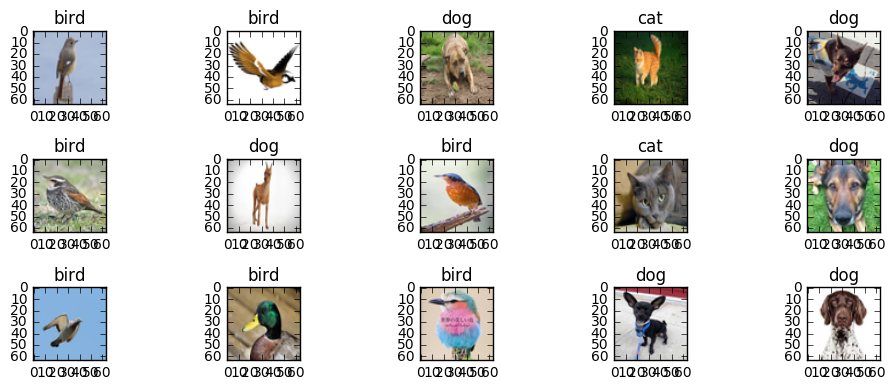

In [6]:
# 画像を読み込んで表示
reader = Cifar10Reader(FLAGS.bin_path)
stop = FLAGS.offset + FLAGS.image_num

fig = plt.figure(figsize=(10, 4))

for index in range(FLAGS.offset, stop):
    rows = int(np.ceil(FLAGS.image_num / 5))
    subplot = fig.add_subplot(rows, 5, index+1)
    image = reader.read(index)  
    imageshow = Image.fromarray(image.byte_array.astype(np.uint8))
    
    subplot.imshow(imageshow)
    subplot.set_title(labels_dict[str(image.label[0])])

fig.tight_layout()

reader.close()